# Data Analyis - Wine Quality Project

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sc

from math import sqrt, log, exp

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from sklearn import datasets,metrics
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet, inconsistent, maxRstat
from scipy.spatial.distance import pdist
from scipy import stats

## I - Presentation

### I.A - Dataset Comprehension

In [2]:
redwine = pd.read_csv("C:/Users/cerfi/OneDrive/Bureau/ISEP/A2/DataAnalysis/Projet/wine quality/winequality-red.csv",sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
whitewine = pd.read_csv("C:/Users/cerfi/OneDrive/Bureau/ISEP/A2/DataAnalysis/Projet/wine quality/winequality-white.csv",sep=";")
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Describing files

In [4]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We merge the 2 datasets in one to have different results

In [6]:
all_wines = pd.concat([redwine,whitewine])

### I.B - Data treatment - Missing values

In [7]:
print("Checking missing values for red wine")
print()
print("Missing data for Fixed acidity :" , redwine["fixed acidity"].isnull().sum())
print("Missing data for volatile acidity :" , redwine["volatile acidity"].isnull().sum())
print("Missing data for Citric acid :" , redwine["citric acid"].isnull().sum())
print("Missing data for residual sugar :" , redwine["residual sugar"].isnull().sum())
print("Missing data for Chlorides :" , redwine["chlorides"].isnull().sum())
print("Missing data for Free sulfur dioxide :" , redwine["free sulfur dioxide"].isnull().sum())
print("Missing data for Total sulfur dioxide :" , redwine["total sulfur dioxide"].isnull().sum())
print("Missing data for Density :" , redwine["density"].isnull().sum())
print("Missing data for pH :" , redwine["pH"].isnull().sum())
print("Missing data for Sulphates :" , redwine["sulphates"].isnull().sum())
print("Missing data for Alcohol :" , redwine["alcohol"].isnull().sum())
print("Missing data for quality :" , redwine["quality"].isnull().sum())

Checking missing values for red wine

Missing data for Fixed acidity : 0
Missing data for volatile acidity : 0
Missing data for Citric acid : 0
Missing data for residual sugar : 0
Missing data for Chlorides : 0
Missing data for Free sulfur dioxide : 0
Missing data for Total sulfur dioxide : 0
Missing data for Density : 0
Missing data for pH : 0
Missing data for Sulphates : 0
Missing data for Alcohol : 0
Missing data for quality : 0


In [8]:
print("Checking missing values for white wine")
print()
print("Missing data for Fixed acidity :" , whitewine["fixed acidity"].isnull().sum())
print("Missing data for volatile acidity :" , whitewine["volatile acidity"].isnull().sum())
print("Missing data for Citric acid :" , whitewine["citric acid"].isnull().sum())
print("Missing data for residual sugar :" , whitewine["residual sugar"].isnull().sum())
print("Missing data for Chlorides :" , whitewine["chlorides"].isnull().sum())
print("Missing data for Free sulfur dioxide :" , whitewine["free sulfur dioxide"].isnull().sum())
print("Missing data for Total sulfur dioxide :" , whitewine["total sulfur dioxide"].isnull().sum())
print("Missing data for Density :" , whitewine["density"].isnull().sum())
print("Missing data for pH :" , whitewine["pH"].isnull().sum())
print("Missing data for Sulphates :" , whitewine["sulphates"].isnull().sum())
print("Missing data for Alcohol :" , whitewine["alcohol"].isnull().sum())
print("Missing data for quality :" , whitewine["quality"].isnull().sum())

Checking missing values for white wine

Missing data for Fixed acidity : 0
Missing data for volatile acidity : 0
Missing data for Citric acid : 0
Missing data for residual sugar : 0
Missing data for Chlorides : 0
Missing data for Free sulfur dioxide : 0
Missing data for Total sulfur dioxide : 0
Missing data for Density : 0
Missing data for pH : 0
Missing data for Sulphates : 0
Missing data for Alcohol : 0
Missing data for quality : 0


### I.C - Primary Analysis

In [9]:
def hist_quality_repartition(data, color_name):        
    plt.hist(data["quality"], edgecolor = "black", color = color_name, bins=[0,1,2,3,4,5,6,7,8,9,10], align="left")

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False) 

    plt.title("Wines quality histogram")
    plt.xlabel("Quality")
    plt.ylabel("Number of wines")

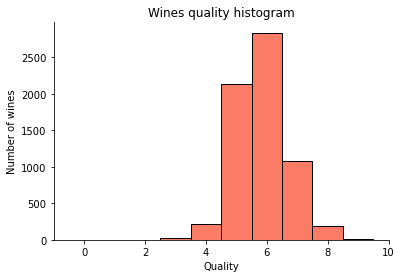

In [10]:
color_name = '#FB7C66'
hist_quality_repartition(all_wines, color_name)

Text(0.5, 1.0, 'All wine quality repartition')

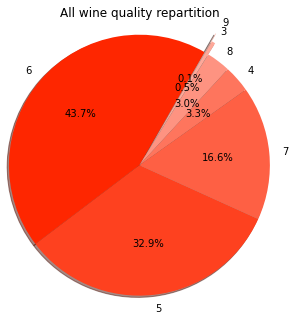

In [11]:
labels = [6,5,7,4,8,3,9]
quality_values = all_wines["quality"].value_counts(normalize='True')
quality_values
plt.pie(quality_values, labels = labels, autopct='%1.1f%%', colors = ["#FE2600", "#FE411F","#FE6044", "#FE755D", "#FE9381", "#FEA899", "#FEBEB2"], explode=[0,0,0,0,0,0.15,0.25], shadow=True, startangle = 60, radius =1.5)
plt.title("All wine quality repartition", pad=40)

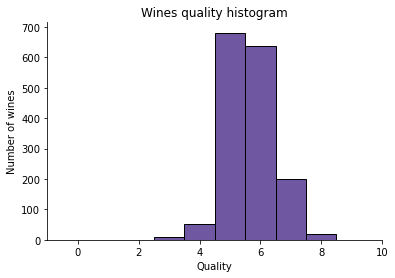

In [12]:
color_name = '#6F57A1'
hist_quality_repartition(redwine, color_name)

Text(0.5, 1.0, 'Red wine quality repartition')

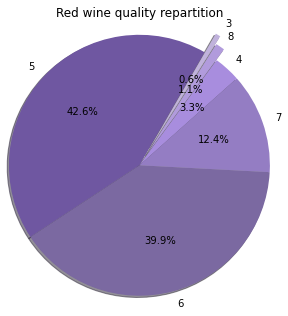

In [13]:
labels = [5,6,7,4,8,3]
quality_values = redwine["quality"].value_counts(normalize='True')
plt.pie(quality_values, labels = labels, autopct='%1.1f%%', colors = ["#6F57A1", "#7B69A1","#947DC3", "#A88DDE", "#B19BDC", "#C0B2DC"], explode=[0,0,0,0,0.15,0.25], shadow=True, startangle = 60, radius =1.5)
plt.title("Red wine quality repartition", pad=40)

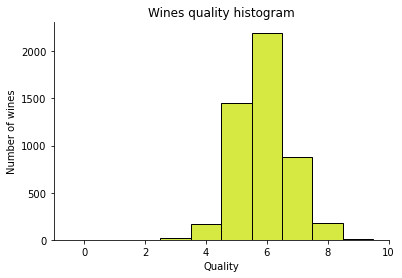

In [14]:
color_name = '#D6E842'
hist_quality_repartition(whitewine, color_name)

Text(0.5, 1.0, 'White wine quality repartition')

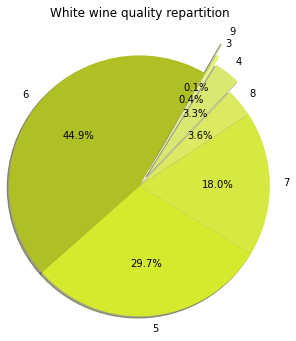

In [15]:
labels = [6,5,7,8,4,3,9]
quality_values = whitewine["quality"].value_counts(normalize='True')
plt.pie(quality_values, labels = labels, autopct='%1.1f%%', colors = ["#AFBF24", "#D5E92D","#D6E842", "#DBEA62", "#DAE770", "#EAF879", "#EFF9A4"], explode=[0,0,0,0,0.15,0.25,0.4], shadow=True, startangle=60, radius = 1.5)
plt.title("White wine quality repartition", pad=60)

Outliers and regulations

In [16]:
z = np.abs(stats.zscore(redwine))
redwine = redwine[(z<3).all(axis=1)]
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [17]:
z = np.abs(stats.zscore(whitewine))
whitewine = whitewine[(z<3).all(axis=1)]
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000
mean,6.839570,0.271365,0.326410,6.416503,0.043169,34.855471,137.607087,0.993967,3.188043,0.485538,10.537463,5.915311
std,0.786279,0.086109,0.101101,4.953728,0.011709,15.417406,41.281527,0.002908,0.143446,0.105856,1.225441,0.854014
min,4.400000,0.080000,0.000000,0.600000,0.012000,2.000000,21.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.775000,0.035000,23.000000,108.000000,0.991680,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.043000,34.000000,133.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,45.000000,166.000000,0.996100,3.280000,0.540000,11.400000,6.000000
max,9.300000,0.580000,0.690000,20.800000,0.110000,86.000000,260.000000,1.001960,3.640000,0.830000,14.200000,8.000000


In [18]:
z = np.abs(stats.zscore(all_wines))
all_wines = all_wines[(z<3).all(axis=1)]

Is there wine out of regulation ?

Sulfuric rates & limitations

In [19]:
def wine_limitations(dataset, color, attribute, low_limit, max_limit):
    limited = []
    for i in dataset[attribute]:
        if i > max_limit:
            limited.append(i)
        elif i < low_limit:
            limited.append(i)

    fig = plt.figure(figsize = (9,4))
    if color == 'red':
        plt.hist(dataset[attribute], edgecolor = "black", color = '#6F57A1', align="left", alpha=0.5)
    elif color == 'white':
        plt.hist(dataset[attribute], edgecolor = "black", color = '#D6E842', align="left", alpha=0.5)
    
    plt.hist(limited, edgecolor = "black", color = 'red', align="left")
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False) 

    plt.xlabel(attribute)
    plt.ylabel("Number of wines")

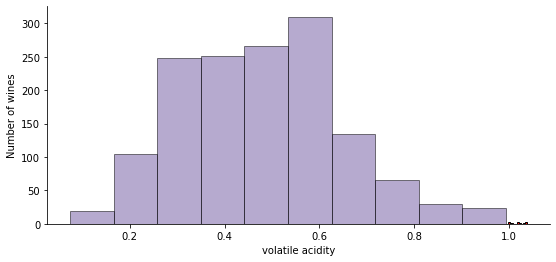

In [20]:
wine_limitations(redwine, 'red', 'volatile acidity', 0, 0.98)

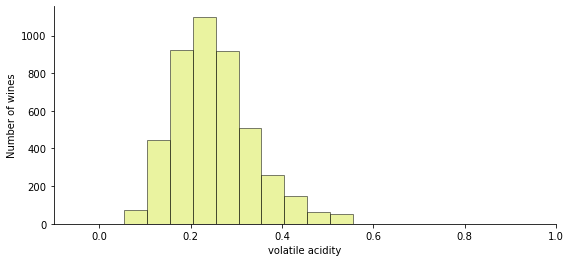

In [21]:
wine_limitations(whitewine, 'white', 'volatile acidity', 0, 0.88)

Alcohol recommendations

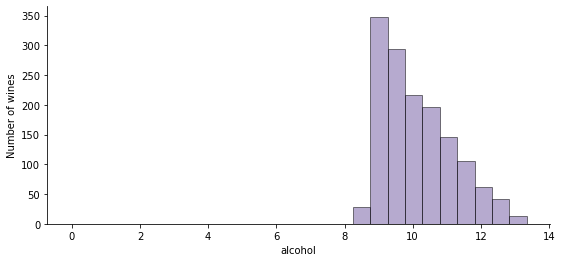

In [22]:
wine_limitations(redwine, 'red', 'alcohol', 4.5, 16)

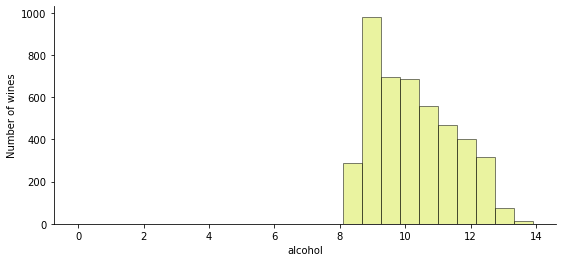

In [23]:
wine_limitations(whitewine, 'white', 'alcohol', 4.5, 16)

Total sulfur dioxide

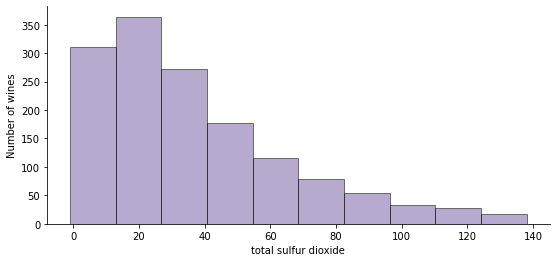

In [24]:
wine_limitations(redwine, 'red', 'total sulfur dioxide', 0, 150)

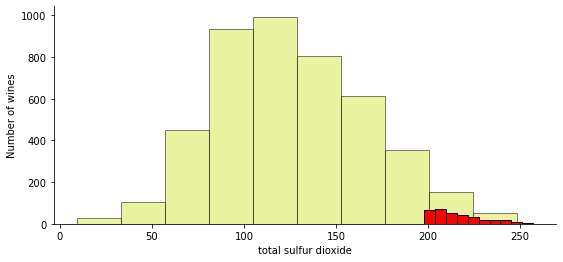

In [25]:
wine_limitations(whitewine, 'white', 'total sulfur dioxide', 0, 200)

## II - Observations

### II.A - Analysis of quality depending on attributes

In [26]:
def average_attribute_byQuality(labels, attribute, unit):
    redwineQ_FA = redwine.copy()
    whitewineQ_FA = whitewine.copy()
    allwinesQ_FA = all_wines.copy()
    
    redwineQ_FA = redwineQ_FA.drop(columns=labels)
    whitewineQ_FA = whitewineQ_FA.drop(columns=labels)
    allwinesQ_FA = allwinesQ_FA.drop(columns=labels)
    
    #We plot the quality depending on the choosen attribute
    fig = plt.figure(figsize = (9,4))
    redwineQ_FA_plot, =plt.plot(redwineQ_FA.groupby(["quality"]).mean(), color='#6F57A1')
    whitewineQ_FA_plot, =plt.plot(whitewineQ_FA.groupby(["quality"]).mean(), color='#D6E842')
    allwinesQ_FA_plot, =plt.plot(allwinesQ_FA.groupby(["quality"]).mean(), color='red', linewidth=3)
    
    #Plot
    title = "Quality depending on " + attribute
    ytitle = attribute + " (" + unit + ")"
    plt.legend([redwineQ_FA_plot, whitewineQ_FA_plot, allwinesQ_FA_plot], ['red wine', 'white wine', 'all wines'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel("Quality")
    plt.ylabel(ytitle)
    plt.title(title)
    plt.grid()    

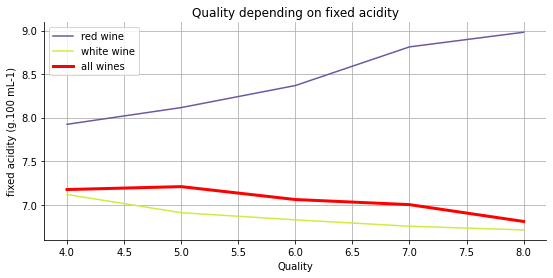

In [27]:
labels = ["volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "fixed acidity"
unit = "g.100 mL-1"
average_attribute_byQuality(labels, attribute, unit)

Quality vs volatile acidity

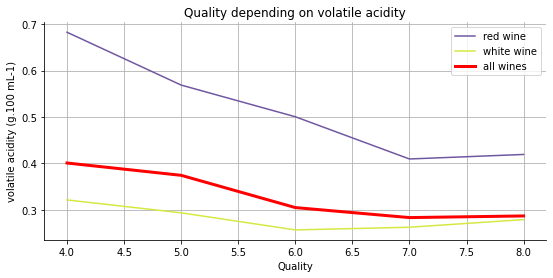

In [28]:
labels = ["fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "volatile acidity"
unit = "g.100 mL-1"
average_attribute_byQuality(labels, attribute, unit)

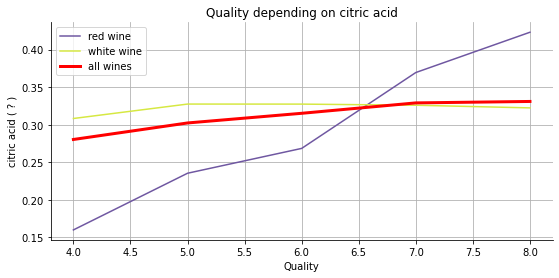

In [29]:
labels = ["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "citric acid"
unit = " ? "
average_attribute_byQuality(labels, attribute, unit)

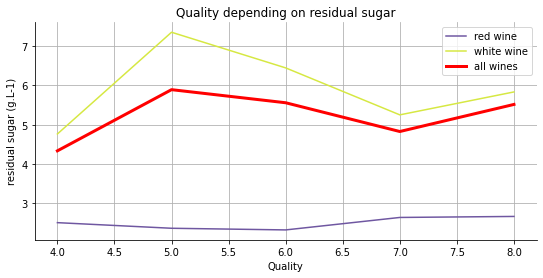

In [30]:
labels = ["fixed acidity","volatile acidity","citric acid","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "residual sugar"
unit = "g.L-1"
average_attribute_byQuality(labels, attribute, unit)

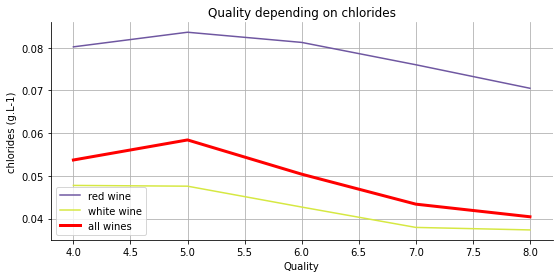

In [31]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "chlorides"
unit = "g.L-1"
average_attribute_byQuality(labels, attribute, unit)

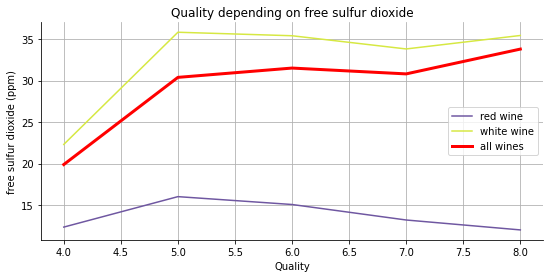

In [33]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "free sulfur dioxide"
unit = "ppm"
average_attribute_byQuality(labels, attribute, unit)

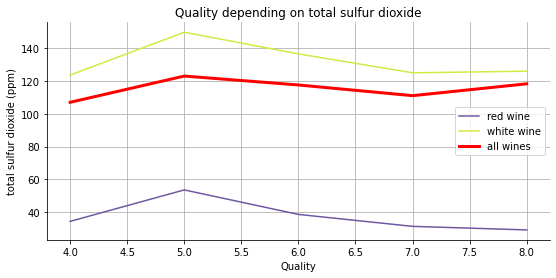

In [34]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "total sulfur dioxide"
unit = "ppm"
average_attribute_byQuality(labels, attribute, unit)

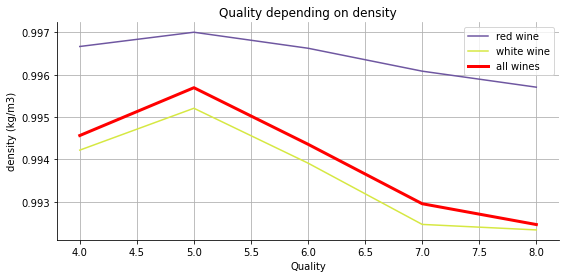

In [35]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","pH","sulphates","alcohol"]
attribute = "density"
unit = "kg/m3"
average_attribute_byQuality(labels, attribute, unit)

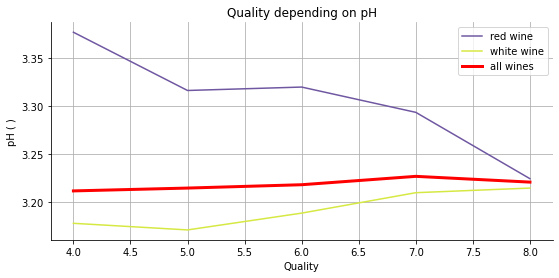

In [36]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","sulphates","alcohol"]
attribute = "pH"
unit = " "
average_attribute_byQuality(labels, attribute, unit)

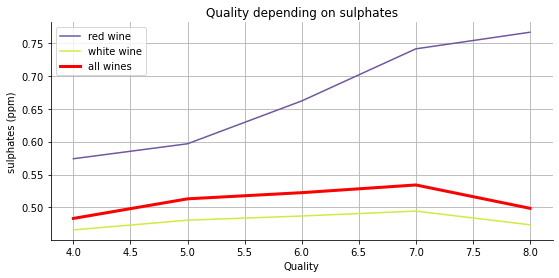

In [37]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","pH","alcohol"]
attribute = "sulphates"
unit = "ppm"
average_attribute_byQuality(labels, attribute, unit)

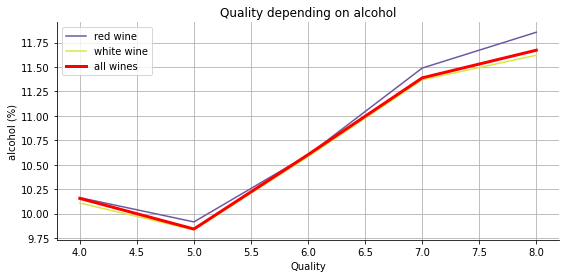

In [38]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates"]
attribute = "alcohol"
unit = "%"
average_attribute_byQuality(labels, attribute, unit)

II.B - Correlation between attributes

In [39]:
def correlation_matrix_wine(dataset, attribute):
    corr = dataset.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
    print(corr[attribute])

fixed acidity           0.145163
volatile acidity       -0.353443
citric acid             0.243999
residual sugar          0.061482
chlorides              -0.108787
free sulfur dioxide    -0.071202
total sulfur dioxide   -0.237745
density                -0.167568
pH                     -0.082164
sulphates               0.386567
alcohol                 0.501501
quality                 1.000000
Name: quality, dtype: float64


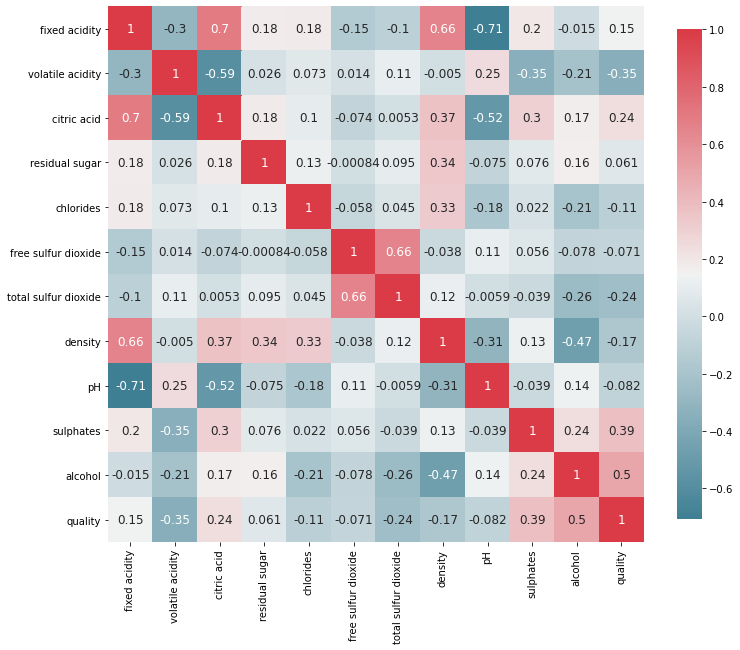

In [40]:
correlation_matrix_wine(redwine, "quality")

fixed acidity          -0.091097
volatile acidity       -0.141278
citric acid             0.003629
residual sugar         -0.105612
chlorides              -0.295800
free sulfur dioxide     0.019293
total sulfur dioxide   -0.171196
density                -0.314034
pH                      0.094761
sulphates               0.037146
alcohol                 0.445076
quality                 1.000000
Name: quality, dtype: float64


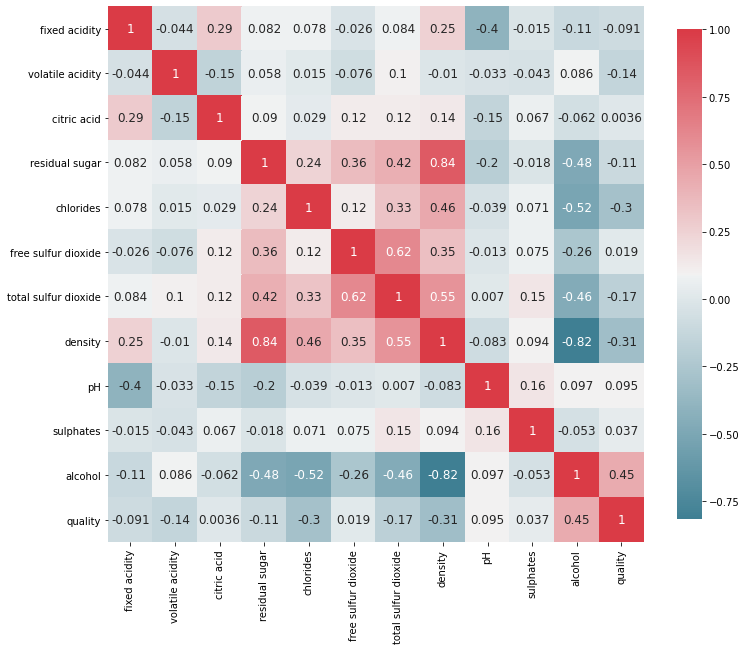

In [41]:
correlation_matrix_wine(whitewine, "quality")

## III - Classification

### III.A - PCA 2 components

### III.B - Boxplots depending on attributes

In [42]:
def boxplots_wine(attribute):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    sns.boxplot(x='quality', y=attribute, data = redwine, palette='Purples', ax=axes[0], flierprops = dict(markerfacecolor = '0.50', markersize = 2))
    sns.boxplot(x='quality', y=attribute, data = whitewine, palette='Greens', ax=axes[1], flierprops = dict(markerfacecolor = '0.50', markersize = 2))
    fig.suptitle(t= 'Boxplot of '+ attribute + " depending on quality", fontsize=15)

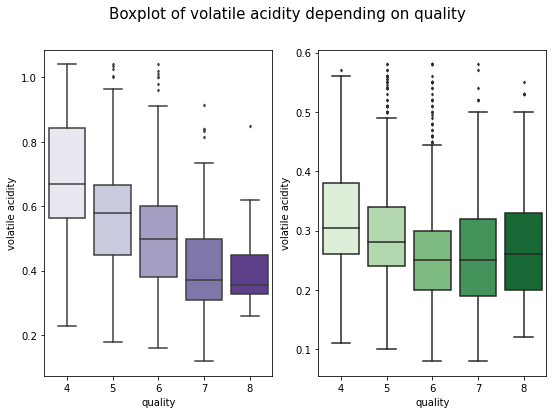

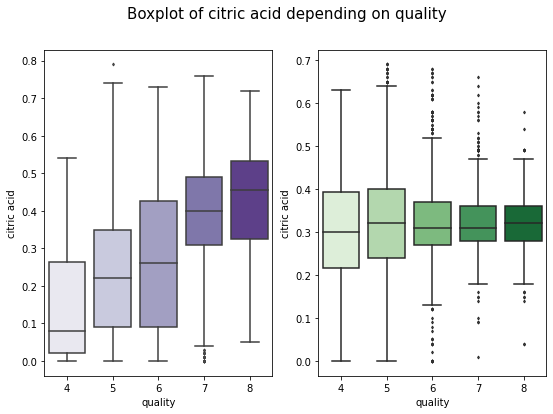

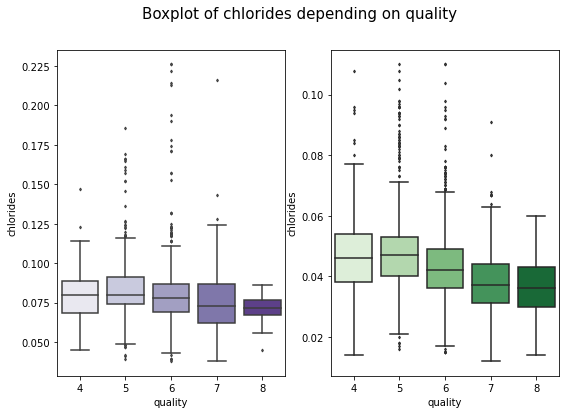

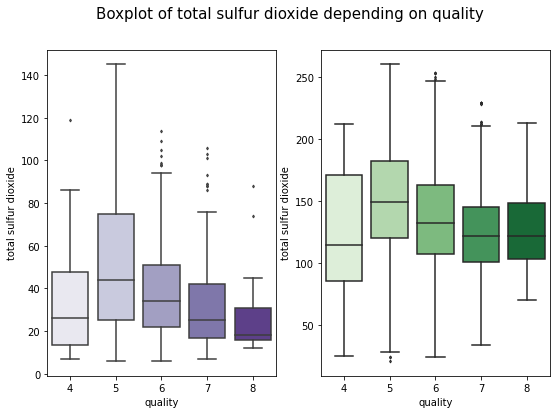

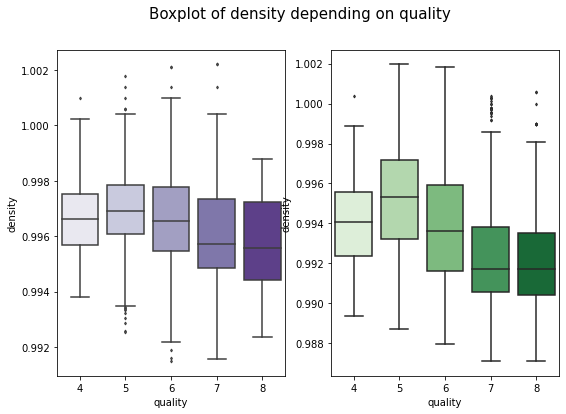

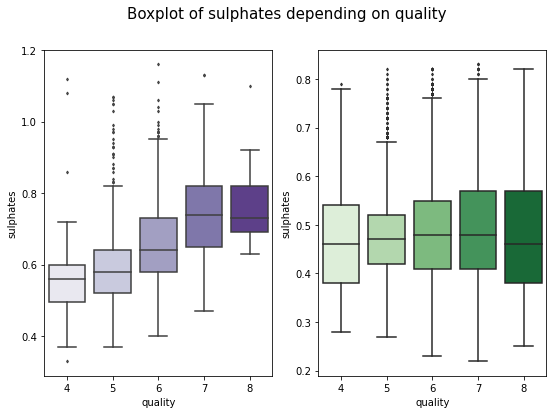

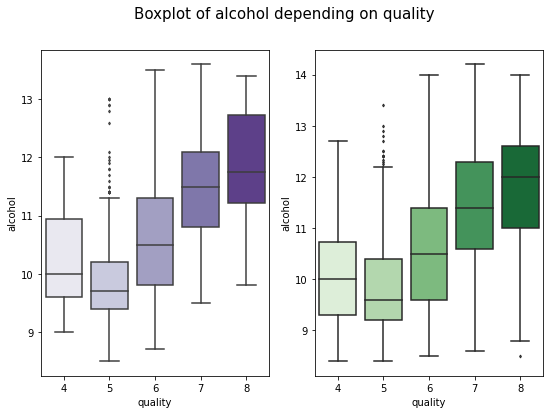

In [43]:
labels = ["volatile acidity","citric acid","chlorides",
         "total sulfur dioxide","density","sulphates", "alcohol"]
for i in range(len(labels)):
    attribute = labels[i]
    boxplots_wine(attribute)

### III.C - Chi-squared test

In [44]:
def chi_squared_test(data, attribute):
    table = pd.crosstab(data[attribute], data["quality"])
    chi2, p, dof, expected =  stats.chi2_contingency(table.values)
    return chi2, p
    
def perform_chi_squared_test(data):
    attributes = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
                  "total sulfur dioxide","density","pH","sulphates","alcohol"]
    results_attributes = []
    results_chi2 = []
    results_p = []
    
    for loop in range(len(attributes)):
        result_chi2, result_p = chi_squared_test(data, attributes[loop])
        print("Attribute :", attributes[loop])
        print("chi2 :", result_chi2)
        print("p :", result_p)
        print()
        
        results_attributes.append(attributes[loop])
        results_chi2.append(results_chi2)
        results_p.append(result_p)
    
    results = [results_attributes, results_chi2, results_p]
    

In [45]:
perform_chi_squared_test(all_wines)

Attribute : fixed acidity
chi2 : 562.4143272206438
p : 9.48565745462126e-22

Attribute : volatile acidity
chi2 : 1131.889882157037
p : 9.38761911531072e-40

Attribute : citric acid
chi2 : 826.460972247796
p : 1.1728624030267502e-51

Attribute : residual sugar
chi2 : 2095.7493909769164
p : 1.4052594995449363e-54

Attribute : chlorides
chi2 : 1352.6313385721733
p : 1.016495968217347e-69

Attribute : free sulfur dioxide
chi2 : 893.6112230081933
p : 9.554076374363774e-34

Attribute : total sulfur dioxide
chi2 : 1916.5332276098907
p : 1.4871886682635878e-51

Attribute : density
chi2 : 6259.9707718127665
p : 3.9510110844187e-120

Attribute : pH
chi2 : 535.2712773085573
p : 2.5967184943590974e-08

Attribute : sulphates
chi2 : 626.4843544191375
p : 7.772776128268316e-26

Attribute : alcohol
chi2 : 2178.8442372375357
p : 1.4168081335893122e-237



In [46]:
perform_chi_squared_test(redwine)

Attribute : fixed acidity
chi2 : 521.296086436199
p : 1.3953285136378202e-10

Attribute : volatile acidity
chi2 : 895.3486657270106
p : 7.1695968649271505e-22

Attribute : citric acid
chi2 : 666.5805363627023
p : 1.6150432073543187e-28

Attribute : residual sugar
chi2 : 419.8784521714282
p : 3.2147345595810444e-09

Attribute : chlorides
chi2 : 538.241617620151
p : 0.002150805598301487

Attribute : free sulfur dioxide
chi2 : 236.38723392693964
p : 0.003048103405960862

Attribute : total sulfur dioxide
chi2 : 592.2467750860449
p : 0.015207477156610943

Attribute : density
chi2 : 2039.5789460067435
p : 3.8433869894036383e-13

Attribute : pH
chi2 : 451.9784318907558
p : 1.609000490563313e-07

Attribute : sulphates
chi2 : 810.8755375719636
p : 1.3136798003828627e-48

Attribute : alcohol
chi2 : 818.9262181502537
p : 2.230141416335987e-65



In [47]:
perform_chi_squared_test(whitewine)

Attribute : fixed acidity
chi2 : 425.560422879293
p : 4.766228595173855e-19

Attribute : volatile acidity
chi2 : 738.2988767889237
p : 2.8050291933455993e-28

Attribute : citric acid
chi2 : 797.0059956130428
p : 4.715012123543534e-52

Attribute : residual sugar
chi2 : 2110.572524950817
p : 5.503865091220465e-54

Attribute : chlorides
chi2 : 972.0906054402301
p : 9.53466167534458e-58

Attribute : free sulfur dioxide
chi2 : 1070.4826358896132
p : 5.515173267224304e-56

Attribute : total sulfur dioxide
chi2 : 1882.8065282780512
p : 5.18153098219885e-66

Attribute : density
chi2 : 5402.926799499701
p : 1.6708301190140865e-91

Attribute : pH
chi2 : 632.320774362357
p : 2.107607244979886e-20

Attribute : sulphates
chi2 : 488.9022540563407
p : 3.7274048318305135e-19

Attribute : alcohol
chi2 : 1656.600443494303
p : 1.0547530575152132e-154



### III.D - Cramer's V

## IV - Predictions

#### Preparing data

In [48]:
# All wines classification version & separation of variables and targets
all_wines['goodquality'] = [1 if x >= 7 else 0 for x in all_wines['quality']]
X_allW = all_wines.drop(['quality','goodquality'], axis = 1)
y_allW = all_wines['goodquality']

# Red wines
redwine['goodquality'] = [1 if x >= 7 else 0 for x in redwine['quality']]
X_redW = redwine.drop(['quality','goodquality'], axis = 1)
y_redW = redwine['goodquality']

# White wines
whitewine['goodquality'] = [1 if x >= 7 else 0 for x in whitewine['quality']]
X_whiW = whitewine.drop(['quality','goodquality'], axis = 1)
y_whiW = whitewine['goodquality']

#### All wines good quality repartition

In [49]:
def wine_good_quality_repartition(data,wine):
    print(data['goodquality'].value_counts())

    #plot
    if(wine == 'all'):
        data['goodquality'].value_counts().plot(kind='bar', edgecolor = "black", color = "#FB7C66",align="center")
        plt.title("All wines good quality histogram")
    elif(wine == 'red'):
        data['goodquality'].value_counts().plot(kind='bar', edgecolor = "black", color = "#6F57A1",align="center")
        plt.title("Red wines good quality histogram")
    elif(wine == 'white'):
        data['goodquality'].value_counts().plot(kind='bar', edgecolor = "black", color = "#D6E842",align="center")
        plt.title("White wines good quality histogram")
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False) 
    plt.xlabel("Quality")
    plt.ylabel("Number of wines")

0    4778
1    1211
Name: goodquality, dtype: int64


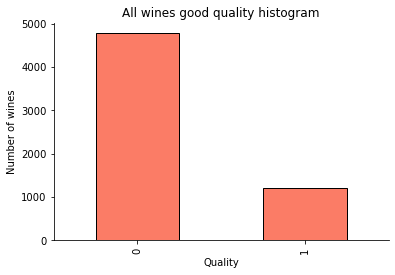

In [50]:
wine_good_quality_repartition(all_wines,'all')

Red wines good quality repartition

0    1250
1     201
Name: goodquality, dtype: int64


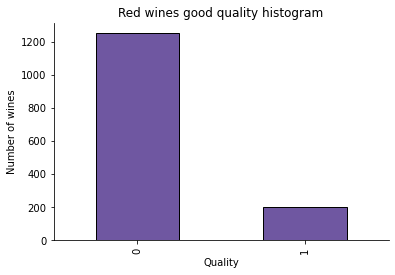

In [51]:
wine_good_quality_repartition(redwine,'red')

White wines good quality repartition

0    3471
1    1016
Name: goodquality, dtype: int64


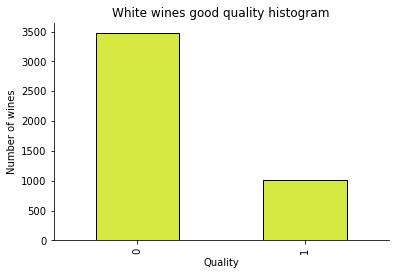

In [52]:
wine_good_quality_repartition(whitewine,'white')

#### Preparing Data for Modelling

In [53]:
# Standardizing Feature Variables
# Red wines
X_redW_features = X_redW
X_redW = StandardScaler().fit_transform(X_redW)

# White wines
X_whiW_features = X_whiW
X_whiW = StandardScaler().fit_transform(X_whiW)


# Spliting data
# Red wines
X_redW_train, X_redW_test, y_redW_train, y_redW_test = train_test_split(X_redW, y_redW, test_size=.25, random_state=0)

# White wines
X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test = train_test_split(X_whiW, y_whiW, test_size=.25, random_state=0)

### IV.A - Naive Bayes

In [133]:
def naive_bayes(X_train, X_test, y_train, y_test):
    NB_model = GaussianNB()
    NB_model.fit(X_train, y_train)
    y_nbPred =NB_model.predict(X_test) 
    print(classification_report(y_test, y_nbPred))
    plot_confusion_matrix(NB_model,X_test,y_test,
                          normalize = None,
                          display_labels = ['Bad quality', 'Good quality'],
                          cmap ='Blues')

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       309
           1       0.42      0.57      0.48        54

    accuracy                           0.82       363
   macro avg       0.67      0.72      0.69       363
weighted avg       0.85      0.82      0.83       363



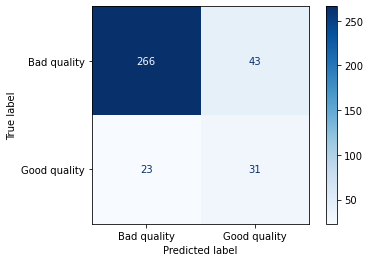

In [134]:
# Red wines
naive_bayes(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       875
           1       0.44      0.63      0.52       247

    accuracy                           0.74      1122
   macro avg       0.66      0.70      0.67      1122
weighted avg       0.78      0.74      0.76      1122



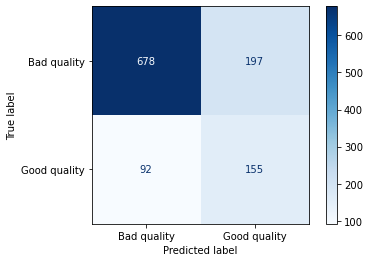

In [135]:
# White wines
naive_bayes(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

### IV.B - Decision tree

In [136]:
def decision_tree(X_train, X_test, y_train, y_test):
    tree_model = DecisionTreeClassifier(random_state=1)
    tree_model.fit(X_train, y_train)
    y_treePred = tree_model.predict(X_test)
    print(classification_report(y_test, y_treePred))
    plot_confusion_matrix(tree_model,X_test,y_test,
                          normalize = None,
                          display_labels = ['Bad quality', 'Good quality'],
                          cmap ='Blues')

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       309
           1       0.55      0.50      0.52        54

    accuracy                           0.87       363
   macro avg       0.73      0.71      0.72       363
weighted avg       0.86      0.87      0.86       363



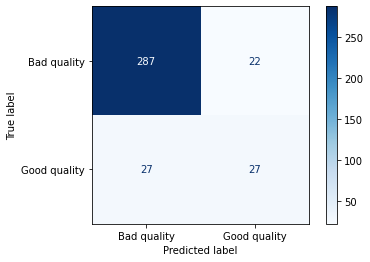

In [137]:
# Red wines
decision_tree(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       875
           1       0.59      0.65      0.62       247

    accuracy                           0.83      1122
   macro avg       0.75      0.76      0.75      1122
weighted avg       0.83      0.83      0.83      1122



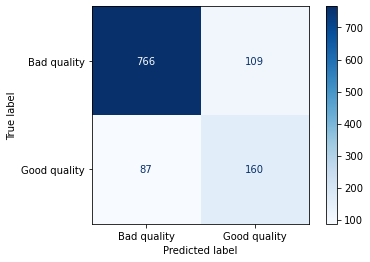

In [138]:
# White wines
decision_tree(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

### IV.C - Random forest

In [139]:
def random_forest(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier(random_state=1)
    random_forest.fit(X_train, y_train)
    y_randomForestPred = random_forest.predict(X_test)
    print(classification_report(y_test, y_randomForestPred))
    plot_confusion_matrix(random_forest,X_test,y_test,
                          normalize = None,
                          display_labels = ['Bad quality', 'Good quality'],
                          cmap ='Blues')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       309
           1       0.75      0.56      0.64        54

    accuracy                           0.91       363
   macro avg       0.84      0.76      0.79       363
weighted avg       0.90      0.91      0.90       363



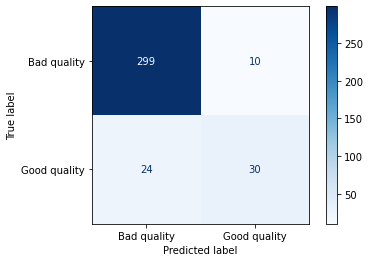

In [140]:
# Red wines
random_forest(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       875
           1       0.75      0.57      0.65       247

    accuracy                           0.86      1122
   macro avg       0.82      0.76      0.78      1122
weighted avg       0.86      0.86      0.86      1122



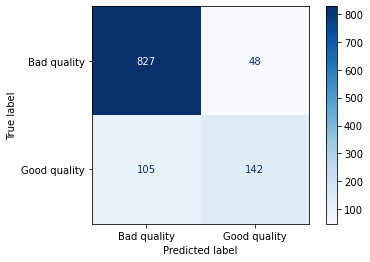

In [141]:
# White wines
random_forest(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

### IV.D - K Nearest Neighbors

In [142]:
def KNN(X_train, X_test, y_train, y_test):
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train,y_train)
    y_knnPred=knn_model.predict(X_test)
    print(classification_report(y_test, y_knnPred))
    plot_confusion_matrix(knn_model,X_test,y_test,
                          normalize = None,
                          display_labels = ['Bad quality', 'Good quality'],
                          cmap ='Blues')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       309
           1       0.52      0.31      0.39        54

    accuracy                           0.85       363
   macro avg       0.70      0.63      0.65       363
weighted avg       0.83      0.85      0.84       363



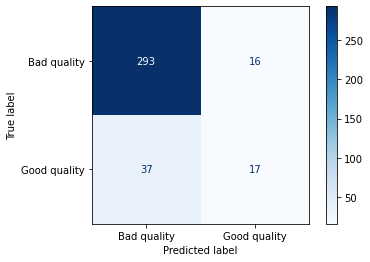

In [143]:
# Red wines
KNN(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       875
           1       0.60      0.47      0.53       247

    accuracy                           0.81      1122
   macro avg       0.73      0.69      0.71      1122
weighted avg       0.80      0.81      0.81      1122



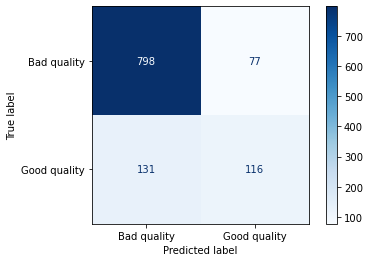

In [144]:
# White wines
KNN(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

### IV.E - Support-Vector Machine

In [145]:
def SVM(X_train, X_test, y_train, y_test):
    svc_model = SVC()
    svc_model.fit(X_train, y_train)
    y_SVCPred=svc_model.predict(X_test)
    print(classification_report(y_test, y_SVCPred))
    plot_confusion_matrix(svc_model,X_test,y_test,
                          normalize = None,
                          display_labels = ['Bad quality', 'Good quality'],
                          cmap ='Blues')

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.63      0.31      0.42        54

    accuracy                           0.87       363
   macro avg       0.76      0.64      0.67       363
weighted avg       0.85      0.87      0.85       363



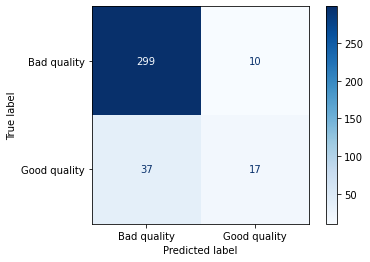

In [146]:
# Red wines
SVM(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       875
           1       0.67      0.31      0.43       247

    accuracy                           0.81      1122
   macro avg       0.75      0.63      0.66      1122
weighted avg       0.80      0.81      0.79      1122



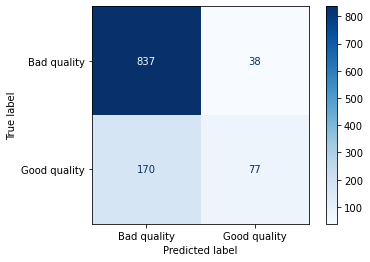

In [147]:
# White wines
SVM(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

### IV.F - Logistic Regression

In [148]:
def logisitc_regression(X_train, X_test, y_train, y_test):
    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train, y_train)
    y_logRegPred=log_reg_model.predict(X_test)
    print(classification_report(y_test, y_logRegPred))
    plot_confusion_matrix(log_reg_model,X_test,y_test,
                          normalize = None,
                          display_labels = ['Bad quality', 'Good quality'],
                          cmap ='Blues')

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       309
           1       0.56      0.37      0.44        54

    accuracy                           0.86       363
   macro avg       0.73      0.66      0.68       363
weighted avg       0.85      0.86      0.85       363



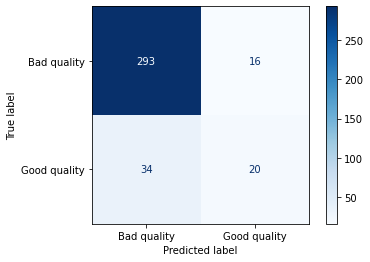

In [149]:
# Red wines
logisitc_regression(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       875
           1       0.52      0.26      0.35       247

    accuracy                           0.78      1122
   macro avg       0.67      0.60      0.61      1122
weighted avg       0.75      0.78      0.76      1122



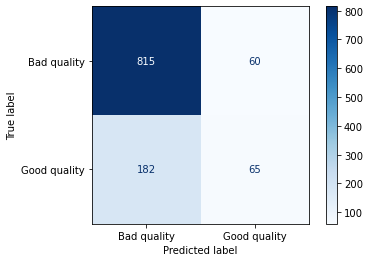

In [150]:
# White wines
logisitc_regression(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

### IV.G What model to choose ? --> random forest

In [72]:
def random_forest_features_importances(X_train, X_test, y_train, y_test, X_features):    
    random_forest = RandomForestClassifier(random_state=1)
    random_forest.fit(X_train, y_train)
    y_randomForestPred = random_forest.predict(X_test)
    
    feat_importances = pd.Series(random_forest.feature_importances_, index=X_features.columns)
    feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

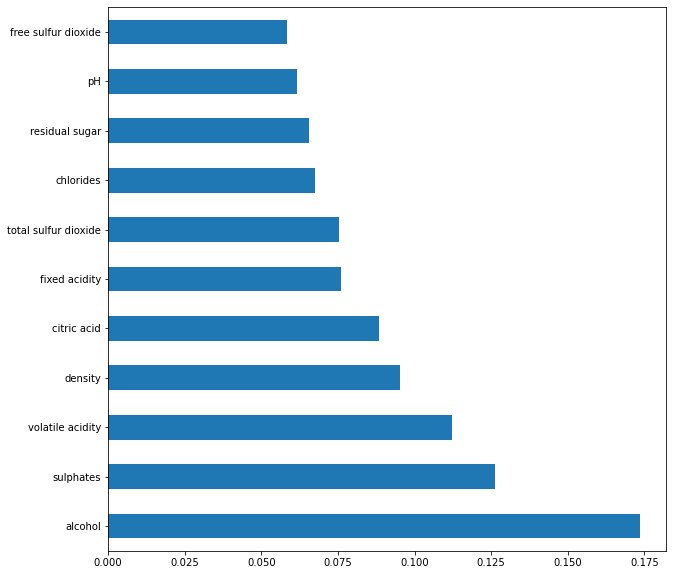

In [73]:
random_forest_features_importances(X_redW_train, X_redW_test, y_redW_train, y_redW_test, X_redW_features)

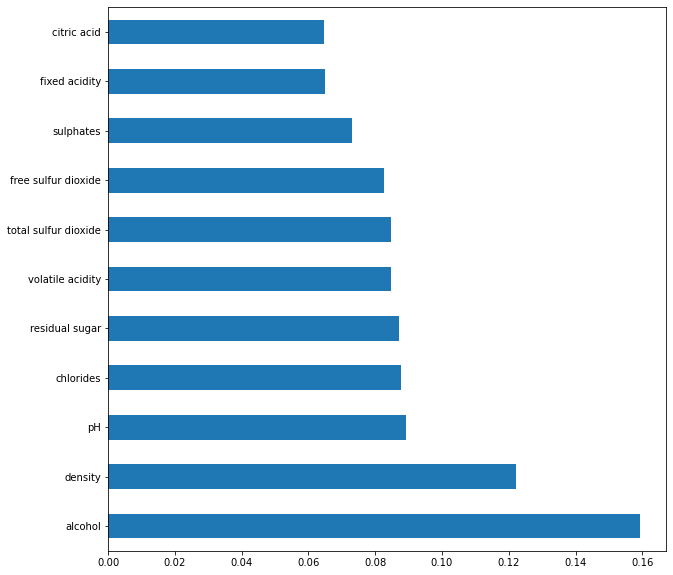

In [74]:
random_forest_features_importances(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test, X_whiW_features)

In [75]:
df_top = redwine[redwine['goodquality']==1]
df_top[["alcohol","sulphates", "citric acid", "volatile acidity", "density"]].describe()

,alcohol,sulphates,citric acid,volatile acidity,density
count,201.000000,201.000000,201.000000,201.000000,201.000000
mean,11.518491,0.743035,0.373731,0.410423,0.996056
std,0.940970,0.121829,0.192116,0.145665,0.001977
min,9.500000,0.470000,0.000000,0.120000,0.991570
25%,10.800000,0.650000,0.310000,0.310000,0.994730
50%,11.600000,0.740000,0.400000,0.370000,0.995720
75%,12.200000,0.820000,0.490000,0.500000,0.997320
max,13.600000,1.130000,0.760000,0.915000,1.002200


In [76]:

df_bot = redwine[redwine['goodquality']==0]
df_bot[["alcohol","sulphates", "citric acid", "volatile acidity", "density"]].describe()

,alcohol,sulphates,citric acid,volatile acidity,density
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,10.244627,0.626432,0.247960,0.541044,0.996815
std,0.919154,0.123685,0.184985,0.164956,0.001647
min,8.500000,0.330000,0.000000,0.160000,0.991500
25%,9.500000,0.540000,0.080000,0.420000,0.995772
50%,10.000000,0.600000,0.240000,0.540000,0.996800
75%,10.900000,0.680000,0.400000,0.645000,0.997815
max,13.500000,1.160000,0.790000,1.040000,1.002100


In [77]:
df_top2 = whitewine[whitewine['goodquality']==1]
df_top2[["alcohol","density", "pH", "chlorides", "residual sugar"]].describe()

,alcohol,density,pH,chlorides,residual sugar
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,11.408842,0.992445,3.210531,0.037846,5.343652
std,1.252739,0.002799,0.154395,0.009791,4.322212
min,8.500000,0.987110,2.840000,0.012000,0.800000
25%,10.700000,0.990537,3.100000,0.031000,1.800000
50%,11.500000,0.991740,3.200000,0.036000,3.950000
75%,12.400000,0.993700,3.320000,0.044000,7.600000
max,14.200000,1.000600,3.640000,0.091000,19.250000


In [78]:
df_bot2 = whitewine[whitewine['goodquality']==0]
df_bot2[["alcohol","density", "pH", "chlorides", "residual sugar"]].describe()

,alcohol,density,pH,chlorides,residual sugar
count,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000
mean,10.282401,0.994413,3.181461,0.044727,6.730539
std,1.093141,0.002786,0.139418,0.011767,5.081763
min,8.400000,0.987940,2.790000,0.014000,0.600000
25%,9.400000,0.992200,3.090000,0.037000,1.700000
50%,10.100000,0.994300,3.170000,0.044000,6.200000
75%,11.000000,0.996540,3.270000,0.051000,10.450000
max,14.000000,1.001960,3.630000,0.110000,20.800000


#### Improving results

In [125]:
def random_forest_improved(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier(random_state=1)
    random_forest.fit(X_train, y_train)
    y_randomForestPred = random_forest.predict(X_test)
    print(classification_report(y_test, y_randomForestPred))
    plot_confusion_matrix(random_forest,X_test,y_test,
                          normalize = None,
                          display_labels = ['Bad quality', 'Good quality'],
                          cmap ='Blues')
    
    #Grid Search Algorithm for parameters optimization
    parameters = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
    
    clf = GridSearchCV(estimator=random_forest, param_grid=parameters, scoring='accuracy')
    clf.fit(X_train, y_train)
    print("Best score : ", clf.best_score_)
    print("Bests parameters : ", clf.best_params_)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       309
           1       0.75      0.56      0.64        54

    accuracy                           0.91       363
   macro avg       0.84      0.76      0.79       363
weighted avg       0.90      0.91      0.90       363

Best score :  0.9044264998097493
Bests parameters :  {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 1000}


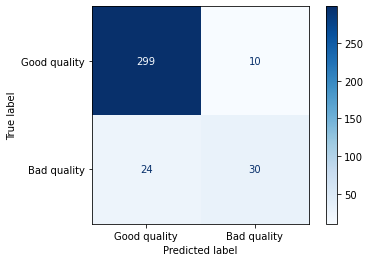

In [126]:
# Red wines
random_forest_improved(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

In [151]:
def random_forest_improved_max(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier(bootstrap = True, max_depth = 80, 
                                           max_features = 3, min_samples_leaf = 3, 
                                           min_samples_split = 12, n_estimators = 1000)
    random_forest.fit(X_train, y_train)
    y_randomForestPred = random_forest.predict(X_test)
    print(classification_report(y_test, y_randomForestPred))
    plot_confusion_matrix(random_forest,X_test,y_test,
                          normalize = None,
                          display_labels = ['Bad quality', 'Good quality'],
                          cmap ='Blues')

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       309
           1       0.72      0.43      0.53        54

    accuracy                           0.89       363
   macro avg       0.81      0.70      0.74       363
weighted avg       0.88      0.89      0.88       363



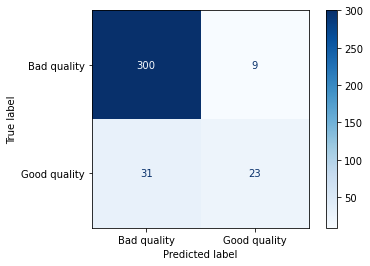

In [152]:
random_forest_improved_max(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       875
           1       0.74      0.49      0.59       247

    accuracy                           0.85      1122
   macro avg       0.80      0.72      0.75      1122
weighted avg       0.84      0.85      0.84      1122



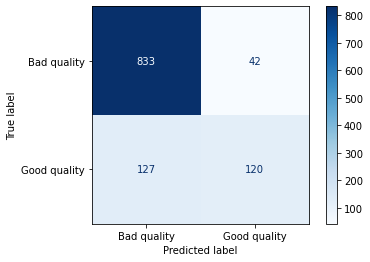

In [154]:
random_forest_improved_max(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

# Others

PCA & KNN all wines

Confusion matrix:
[[ 104   40   36    7    0]
 [  46 1643  285   67   12]
 [  29  248 2180  186   50]
 [   4   24  122  752   23]
 [   1    3   13   15   99]]

Accuracy:
0.7977959592586409
Confusion matrix:
[[ 104   29   47   13    3]
 [  44 1644  293   84   20]
 [  26  264 2146  194   47]
 [   8   19  136  724   19]
 [   2    2   14   12   95]]

Accuracy:
0.7869427283352813


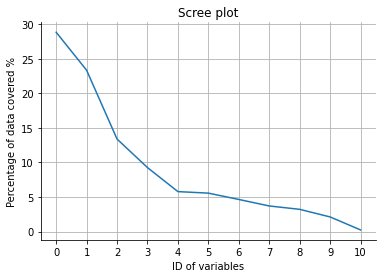

In [79]:
X = all_wines.loc[:,'fixed acidity':'alcohol']
y = all_wines['quality']

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
pca = PCA() # creates an instance of PCA class
results = pca.fit(X) # applies PCA on predictor variables
Z = results.transform(X) # create a new array of latent variables

plt.plot(results.explained_variance_ratio_*100) # scree plot
plt.ylabel("Percentage of data covered %")
plt.xlabel("ID of variables")
plt.title("Scree plot")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


pd.DataFrame(Z[:,:6], columns=list(
[u'Acidity', u'Sulfides', u'More alcohol', u'Chlorides', u'More residual sugar', u'Less pH'])).head(10)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#original dataset
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
pred = neigh.predict(X)
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

#6 PC
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Z[:,:6],y)
pred = neigh.predict(Z[:,:6])
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))